<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random


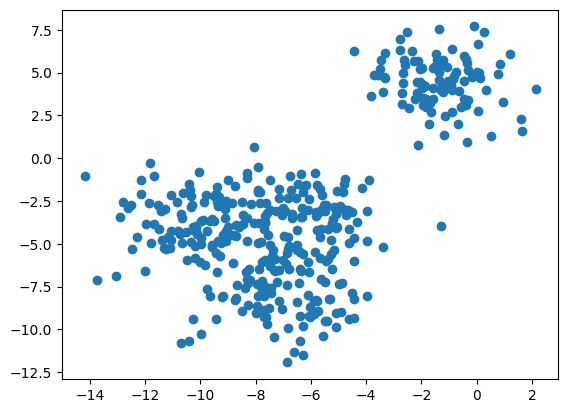

In [ ]:
random.seed(1)
x, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5)

plt.scatter(x[:,0], x[:,1])
plt.show()

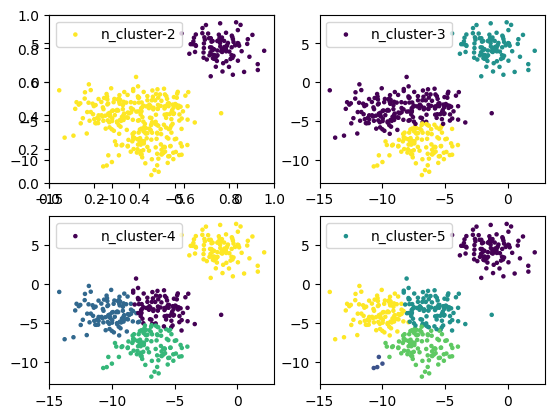

In [ ]:
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 sc = SpectralClustering(n_clusters=i).fit(x)
 f.add_subplot(2, 2, i-1)
 plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()

plt.show()

In [ ]:
SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None, n_clusters=4, n_components=None, n_init=10, n_jobs=None, n_neighbors=10, random_state=None )

SpectralClustering(eigen_tol=0.0, n_clusters=4)

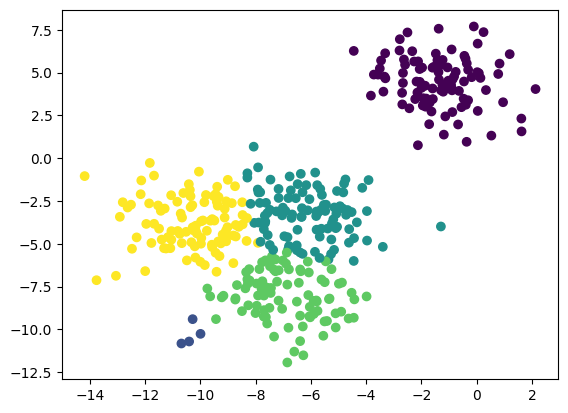

In [ ]:
labels = sc.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

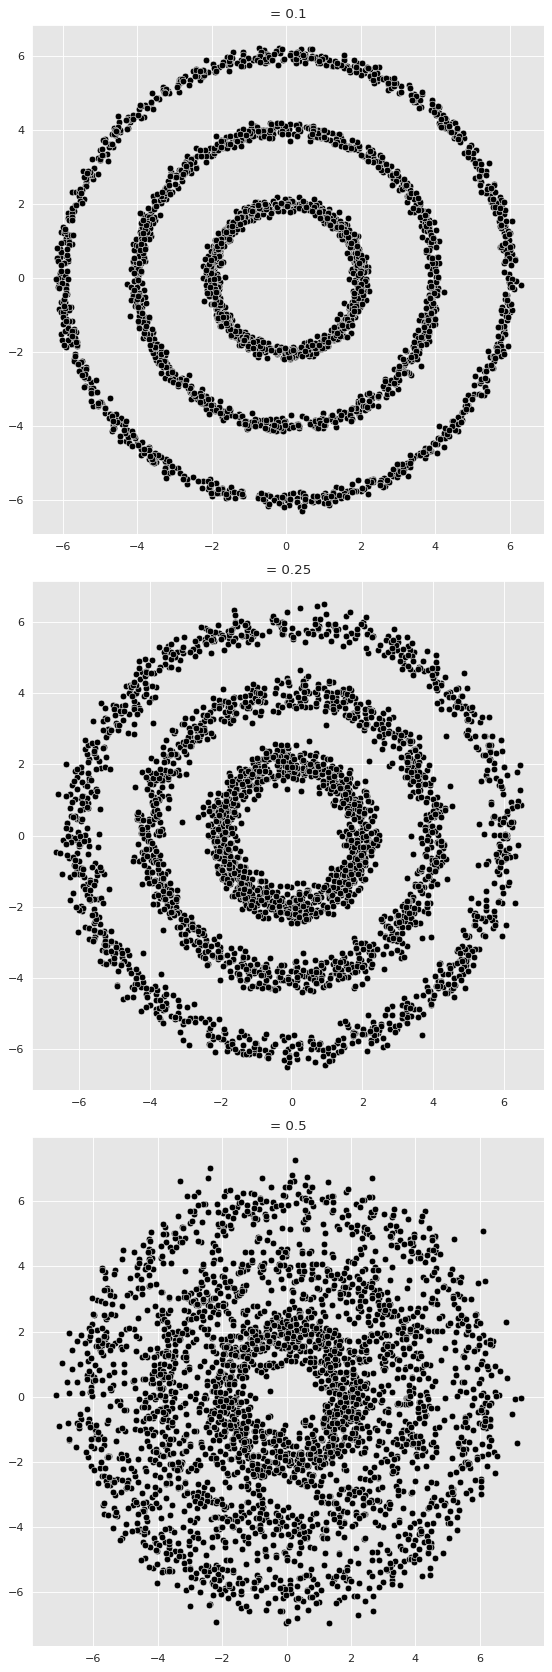

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Set random state.
rs = np.random.seed(25)

def generate_circle_sample_data(r, n, sigma):
    """Generate circle data with random Gaussian noise."""
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    return x, y

def generate_concentric_circles_data(param_list):
    """Generates many circle data with random Gaussian noise."""
    coordinates = [
        generate_circle_sample_data(param[0], param[1], param[2])
     for param in param_list
    ]
    return coordinates


# Set global plot parameters.
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

# Number of points per circle.
n = 1000
# Radius.
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise).
sigmas = [0.1, 0.25, 0.5]

param_lists = [[(r, n, sigma) for r in r_list] for sigma in sigmas]
# We store the data on this list.
coordinates_list = []

fig, axes = plt.subplots(3, 1, figsize=(7, 21))

for i, param_list in enumerate(param_lists):

    coordinates = generate_concentric_circles_data(param_list)

    coordinates_list.append(coordinates)

    ax = axes[i]

    for j in range(0, len(coordinates)):

        x, y = coordinates[j]
        sns.scatterplot(x=x, y=y, color='black', ax=ax)
        ax.set(title=f'= {param_list[0][2]}')

plt.tight_layout()
